In [1]:
#https://github.com/Pyomo/PyomoGallery/blob/master/transport/transport.ipynb
#god docs^^
#matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pyomo.environ import *

In [3]:
m = ConcreteModel()
m.data_usage = [10,10,9,8,7,6,2,4,9,10]
m.data_solar = [3,3,5,7,8,8,10,8,5,5]
samples = len(m.data_usage)

In [4]:
# declare decision variables
m.j = range(samples)
m.x2 = Var(m.j, domain=NonNegativeReals) #second stage power
m.x1 = Var(domain=NonNegativeReals) #first stage power
# consts
c1 = 10 #cost of planned energy
c2 = 25 #cost of last minute energy

In [5]:
# declare objective
def objective_rule(model):
    second_stage = sum(model.x2[j] for j in range(0,samples))  
    return samples*c1*m.x1 + c2*second_stage
m.objective = Objective(rule=objective_rule, sense=minimize, doc='Define objective function')


In [6]:
# declare constraints    
def supply_rule(m, j):
    demand = m.data_usage[j] - m.data_solar[j]
    return m.x1 + m.x2[j] >= demand
m.supply = Constraint(m.j, rule=supply_rule, doc='Observe supply limit at plant i')

In [7]:
# solve
SolverFactory('gurobi').solve(m).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x12
  Lower bound: 575.0
  Upper bound: 575.0
  Number of objectives: 1
  Number of constraints: 11
  Number of variables: 12
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 12
  Number of nonzeros: 21
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (subje

In [8]:
m.x1()



4.0

In [21]:
m.x2[:]() 

TypeError: can only concatenate list (not "float") to list

In [25]:
x1 = np.array(m.x1())
x2 = np.array(m.x2[:]())
x1 + x2

array([7., 7., 4., 4., 4., 4., 4., 4., 4., 5.])

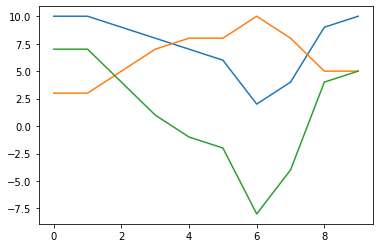

In [28]:
plt.plot(m.data_usage)
plt.plot(m.data_solar)
data_u = np.array(m.data_usage)
data_s = np.array(m.data_solar)
plt.plot(data_u - data_s)


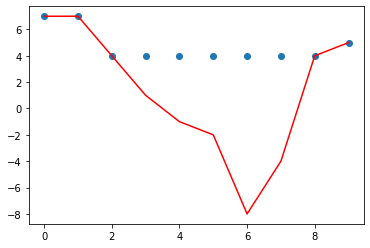

In [38]:
plt.plot(data_u - data_s, 'red')
xax = np.arange(10)
plt.scatter(xax,x1 + x2)